[View in Colaboratory](https://colab.research.google.com/github/billmlion/keras_ws/blob/master/7_Mlp_mnist.ipynb)

>[1.数据预处理](#scrollTo=-BL3o2r19XVi)

>>[MNIST数据下载](#scrollTo=yp3c_2KK0JF3)

>>>[查看数据](#scrollTo=rFpn41Md0ieS)

>>[多层感知器模型数据预处理](#scrollTo=8sJHaRZg-2q4)

>>>[features 数据预处理](#scrollTo=WbGUZEq4_EyZ)

>>>[label 数据预处理](#scrollTo=F-DoWFv1Byfw)

>[2.建立模型](#scrollTo=fySSQEbEGZF1)

>[3.进行训练](#scrollTo=3urUPZiiG2ke)

>[4.以测试数据评估模型准确率](#scrollTo=yueitWfWQwjb)



**安装完成anaconda后，**

### 本地环境搭建

$>md workspace

$>cd workspace

$>conda create --name tensorFlow python=3.6 anaconda

### 启动tensorflow的Anaconda虚拟环境
$>conda activate tensorFlow

### 进入tensorflow的Anaconda虚拟环境
(tensorFlow)$pip install --upgrade pip

### 安装tensorFlow
$pip install tensorFlow

### 安装keras
$pip install keras

### 启动jupyter notebook
$jupyter notebook



# 1.数据预处理




In [0]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

## MNIST数据下载


In [0]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print('train data=',len(x_train_image))
print(' test data=',len(x_test_image))

train data= 60000
 test data= 10000


In [0]:
#@title x_train_image 为三维矩阵 6000 x 28 x 28
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


### 查看数据

In [0]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2) #设置显示大小
    plt.imshow(image, cmap='binary')
    plt.show()

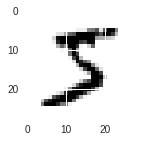

In [0]:
plot_image(x_train_image[0])

In [0]:
y_train_label[0]

5

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14) #设置显示大小
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i) # 建立subgraph子图形为5行5列
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([])  #不显示x，y刻度
        ax.set_yticks([])        
        idx+=1 
    plt.show()

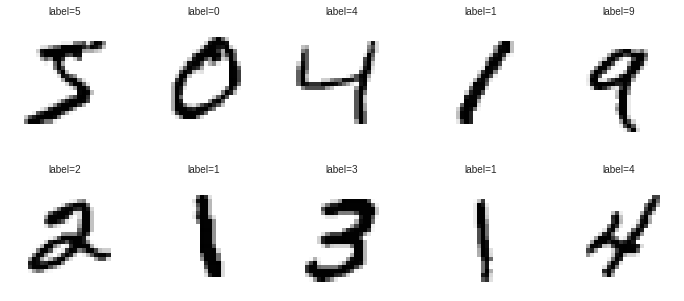

In [0]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

In [0]:
print ('x_test_image:',x_test_image.shape)
print ('y_test_label:',y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


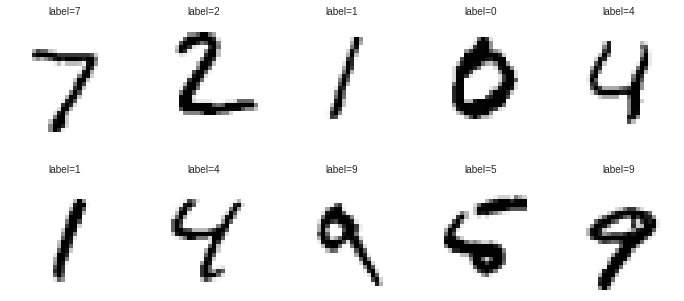

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

## 多层感知器模型数据预处理

In [0]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


### features 数据预处理

In [0]:
#@title 转化为一维

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
print ('x_train:',x_Train.shape)
print ('x_test:',x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [0]:
x_train_image[0]  

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
#@title 数字标准化

x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

In [0]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### label 数据预处理

In [0]:
#@title one-hot encoding(一位有效编码) 转换为10个0或1的组合
y_TrainOne_Hot = np_utils.to_categorical(y_train_label)
y_TestOne_Hot = np_utils.to_categorical(y_test_label)

In [0]:
y_TrainOne_Hot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# 2.建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 3. 进行训练

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [0]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_TrainOne_Hot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4434 - acc: 0.8813 - val_loss: 0.2193 - val_acc: 0.9400
Epoch 2/10
 - 2s - loss: 0.1916 - acc: 0.9452 - val_loss: 0.1558 - val_acc: 0.9556
Epoch 3/10
 - 2s - loss: 0.1358 - acc: 0.9616 - val_loss: 0.1264 - val_acc: 0.9645
Epoch 4/10
 - 2s - loss: 0.1030 - acc: 0.9704 - val_loss: 0.1125 - val_acc: 0.9675
Epoch 5/10
 - 2s - loss: 0.0813 - acc: 0.9774 - val_loss: 0.0986 - val_acc: 0.9713
Epoch 6/10
 - 2s - loss: 0.0661 - acc: 0.9813 - val_loss: 0.0938 - val_acc: 0.9718
Epoch 7/10
 - 2s - loss: 0.0545 - acc: 0.9848 - val_loss: 0.0916 - val_acc: 0.9737
Epoch 8/10
 - 2s - loss: 0.0458 - acc: 0.9878 - val_loss: 0.0830 - val_acc: 0.9763
Epoch 9/10
 - 2s - loss: 0.0381 - acc: 0.9902 - val_loss: 0.0824 - val_acc: 0.9766
Epoch 10/10
 - 2s - loss: 0.0316 - acc: 0.9920 - val_loss: 0.0802 - val_acc: 0.9763


In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

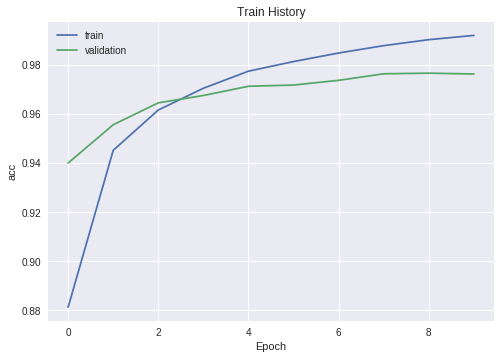

In [0]:
show_train_history(train_history,'acc','val_acc')

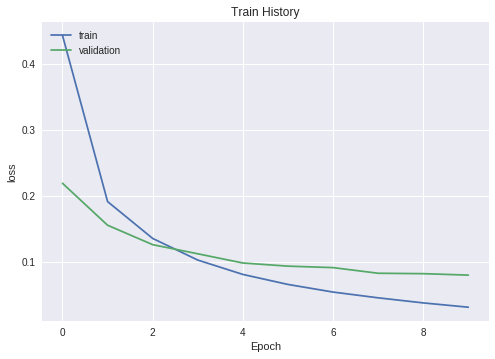

In [0]:
show_train_history(train_history,'loss','val_loss')

#  4.以测试数据评估模型准确率

In [0]:
scores = model.evaluate(x_Test_normalize, y_TestOne_Hot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 73us/step

accuracy= 0.9766


# 5.进行预测

In [0]:
prediction=model.predict_classes(x_Test)

In [0]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

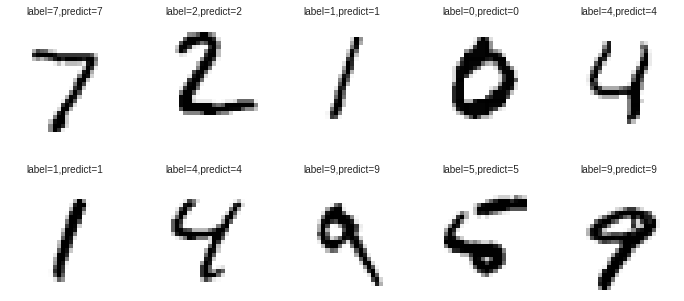

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# 6.显示混淆矩阵

In [0]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1012,1,1,0,2,4,7,0
3,0,0,3,992,0,1,0,3,6,5
4,1,0,5,1,960,0,3,1,2,9
5,3,0,0,17,1,853,7,1,7,3
6,5,3,3,1,4,3,937,0,2,0
7,0,5,12,7,1,0,0,990,5,8
8,3,0,3,5,1,1,2,2,956,1


In [0]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [0]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


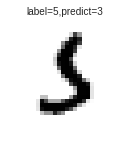

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

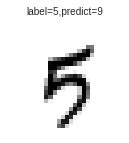

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)